In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [21]:
os.chdir('/home/sidrah19220/nmd/loomfiles/randomization/wild/spl/')

In [3]:
#READ EXPRESSION MATRIX AND TRANSCRIPTOMIC MATRIX
eud = pd.read_csv('matrix-2-transcriptome-correlation.csv', index_col =0)
exp = pd.read_csv('matrix-5-Expression.csv', index_col = 0)

FINDING MATURE - IMMATURE PAIR OF ORs 

In [4]:
#MAKE A LIST OF ALL ORS AND CELLS AND TRANSPOSE THE EXP MATRIX
olf_rec = exp.columns.tolist()
ors=list(exp.columns.values.tolist())
cells=exp.index.values
#exp.index = cells
tr_exp=exp.T

In [5]:
#CHECK IF THE CELL EXPRESSES MORE THAN 8 ORS THEN APPEND THE CELL ID 
all_ors={}
zero_exp=[]
for cell in cells:
    all_ors[cell]=[]
    cell_exps=sorted(tr_exp[cell].tolist(), reverse=True)
    if cell_exps[0]>0:
        if tr_exp[cell].tolist().count(max(cell_exps)) > 8:
            for i in range(tr_exp[cell].tolist().count(max(tr_exp[cell]))):
                all_ors[cell].append(tr_exp.sort_values(by=cell, ascending=False).index[i])
        else:
            for i in range(8):
                if cell_exps[i]>0:
                    all_ors[cell].append(tr_exp.sort_values(by=cell, ascending=False).index[i])
    else:
        zero_exp.append(cell)

In [6]:
#INDIVIDUALLY MAKE A DICTIONARY FOR EACH CELL TYPE WHERE THE CELL ID AND THE EXPRESSED OR IS STORED
cell_imt={}
cell_imm={}
cell_mat={}
for key,value in all_ors.items():
    if key.startswith("IMT"):
        cell_imt[key]=[]
        for val in value:
            if val.startswith("Olfm"):
                continue
            else:
                cell_imt[key].append(val)
    if key.startswith("MA"):
        cell_mat[key]=[]
        for val in value:
            if val.startswith("Olfm"):
                continue
            else:
                cell_mat[key].append(val)
    if key.startswith("IMM"):
        cell_imm[key]=[]
        for val in value:
            if val.startswith("Olfm"):
                continue
            else:
                cell_imm[key].append(val)


In [7]:
#TO TREAT IMMATURE AND TRANSITION AS ONE, MERGE THE DICTIONARY
cell_imm_imt={}
for key,value in all_ors.items():
    if key.startswith("IM"):
        cell_imm_imt[key]=[]
        for val in value:
            if val.startswith("Olfm"):
                continue
            else:
                cell_imm_imt[key].append(val)

In [8]:
#CHECK IF THERE IS NO EXPRESSION OF OR, MAKE A NEW DICTIONARY WITH ONLY EXPRESSED ORs
di1={}
for key,value in cell_imm_imt.items():
    di2={}
    if len(value)<1:
        continue
    else:
        for val in value:
            di2[val]=tr_exp[key][val]
            di1[key]=di2

0    2242
1       5
2       3
dtype: int64
0    2242
1       5
2       3
dtype: int64
9
0    2235
1      11
2       4
dtype: int64
0    2235
1      11
2       4
dtype: int64
17
0    2221
1      24
2       5
dtype: int64
0    2221
1      24
2       5
dtype: int64
43
0    2194
1      49
2       5
3       2
dtype: int64
0    2193
1      50
2       5
3       2
dtype: int64
85
0    2149
1      85
2      11
4       4
3       1
dtype: int64
0    2137
1      92
2      15
4       4
3       2
dtype: int64
169
0    2100
1     122
2      23
5       3
4       2
dtype: int64
0    2077
1     139
2      25
5       4
3       3
4       2
dtype: int64
253
0    2033
1     162
2      43
6       4
3       3
7       3
4       1
5       1
dtype: int64
0     1995
1      185
2       56
3        3
5        3
11       3
6        2
7        2
4        1
dtype: int64
421
0    1989
1     195
2      44
3      12
6       4
7       3
4       2
8       1
dtype: int64
0     1939
1      216
2       66
3       17
6        

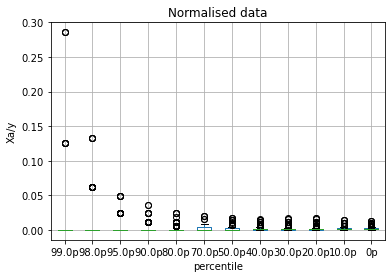

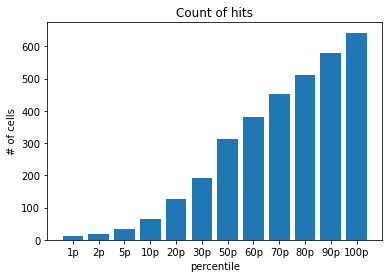

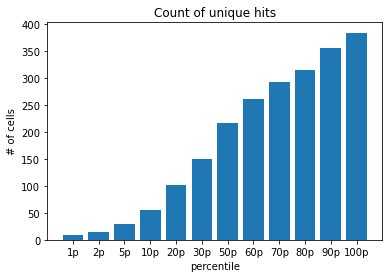

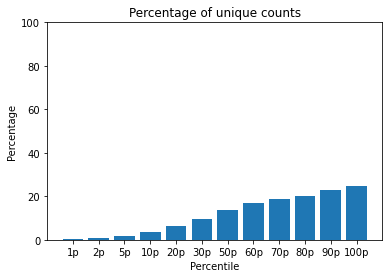

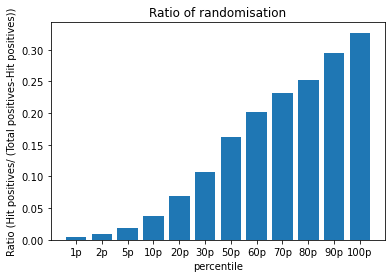

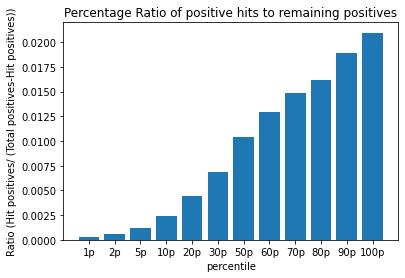

0    2235
1      12
2       3
dtype: int64
0    2235
1      12
2       3
dtype: int64
9
0    2230
1      17
2       3
dtype: int64
0    2230
1      17
2       3
dtype: int64
17
0    2218
1      28
2       4
dtype: int64
0    2218
1      28
2       4
dtype: int64
43
0    2187
1      58
3       3
2       2
dtype: int64
0    2185
1      60
3       3
2       2
dtype: int64
85
0    2128
1     109
2      10
3       3
dtype: int64
0    2110
1     118
2      16
3       6
dtype: int64
169
0    2076
1     143
2      24
3       3
5       3
6       1
dtype: int64
0    2057
1     155
2      26
3       5
5       4
6       2
9       1
dtype: int64
253
0    2007
1     178
2      38
3      19
7       4
6       3
4       1
dtype: int64
0     1973
1      190
2       54
3       21
11       4
4        3
5        2
7        2
6        1
dtype: int64
421
0    1967
1     206
2      41
3      26
4       3
6       3
9       3
8       1
dtype: int64
0     1921
1      219
2       67
3       28
4        5
5       

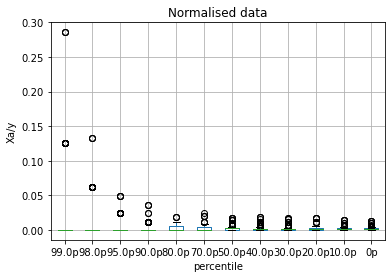

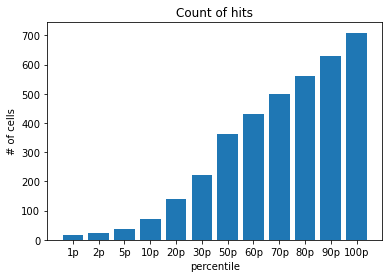

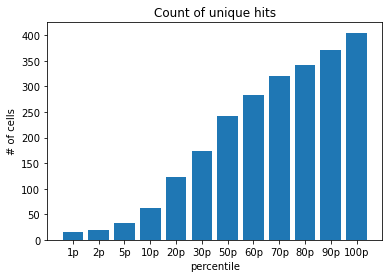

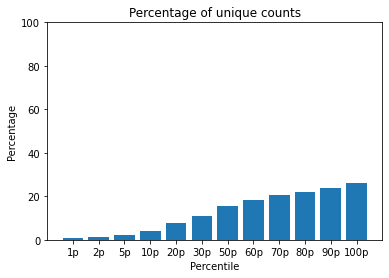

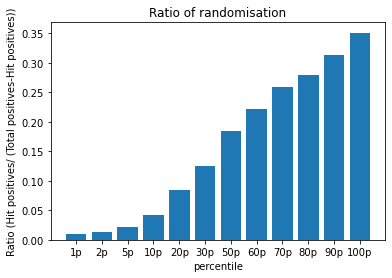

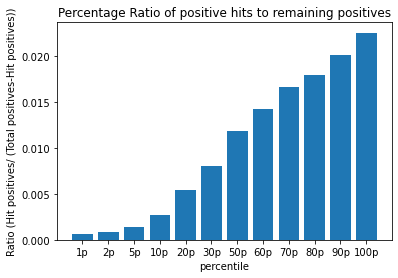

0    2242
1       7
2       1
dtype: int64
0    2242
1       7
2       1
dtype: int64
9
0    2237
1      10
2       3
dtype: int64
0    2237
1      10
2       3
dtype: int64
17
0    2224
1      21
2       5
dtype: int64
0    2224
1      20
2       6
dtype: int64
43
0    2197
1      47
2       6
dtype: int64
0    2194
1      48
2       8
dtype: int64
85
0    2141
1      92
2      15
3       2
dtype: int64
0    2124
1     104
2      15
3       7
dtype: int64
169
0    2084
1     137
2      23
3       4
5       1
6       1
dtype: int64
0    2066
1     145
2      26
3       8
4       3
5       1
6       1
dtype: int64
253
0    1995
1     183
2      51
3      18
7       2
6       1
dtype: int64
0     1957
1      200
2       65
3       14
5        8
4        3
7        2
11       1
dtype: int64
421
0    1952
1     214
2      52
3      22
4       6
5       1
6       1
7       1
8       1
dtype: int64
0     1900
1      238
2       72
3       22
5        7
4        4
6        3
7        3
12    

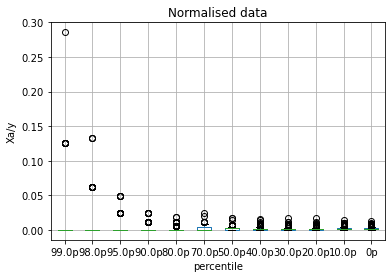

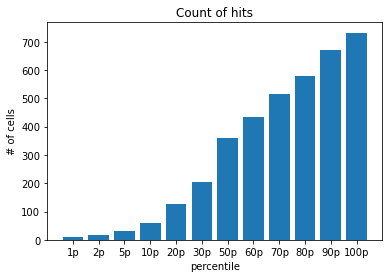

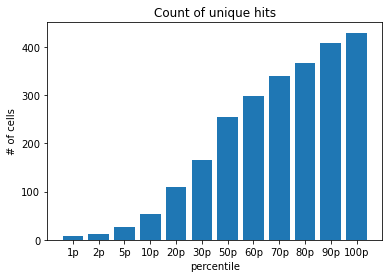

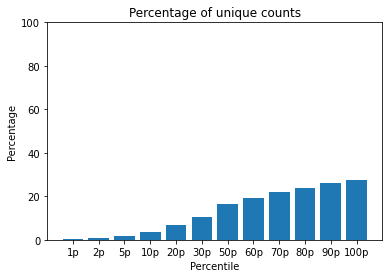

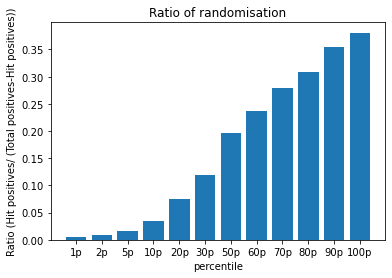

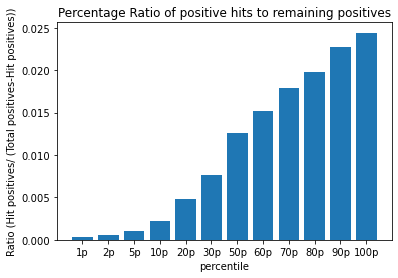

0    2244
1       4
2       2
dtype: int64
0    2244
1       4
2       2
dtype: int64
9
0    2236
1      12
2       2
dtype: int64
0    2236
1      12
2       2
dtype: int64
17
0    2220
1      26
2       4
dtype: int64
0    2220
1      26
2       4
dtype: int64
43
0    2197
1      47
2       5
3       1
dtype: int64
0    2196
1      48
2       5
3       1
dtype: int64
85
0    2132
1     106
2       7
3       4
4       1
dtype: int64
0    2120
1     116
2       8
3       5
4       1
dtype: int64
169
0    2082
1     139
2      23
5       3
3       1
4       1
6       1
dtype: int64
0    2069
1     149
2      24
5       4
3       2
4       1
6       1
dtype: int64
253
0    1998
1     178
2      51
3      16
7       3
6       2
4       1
5       1
dtype: int64
0     1967
1      191
2       60
3       22
5        4
7        3
4        1
6        1
11       1
dtype: int64
421
0    1942
1     220
2      56
3      18
4       8
6       3
7       3
dtype: int64
0     1900
1      234
2       68


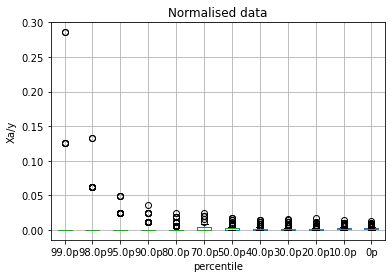

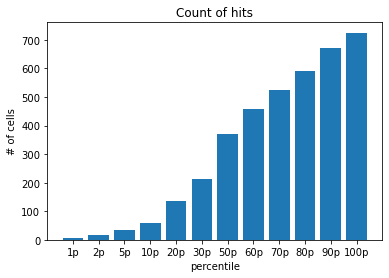

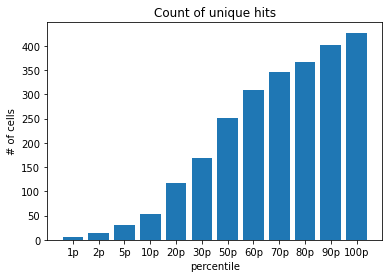

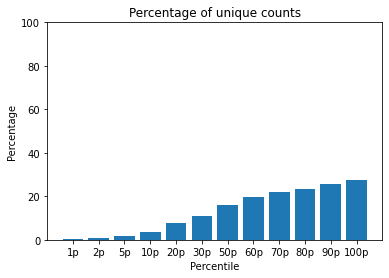

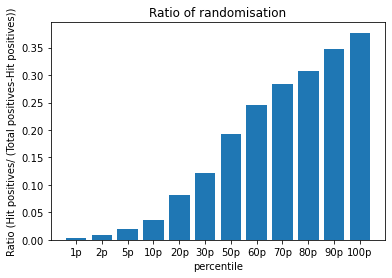

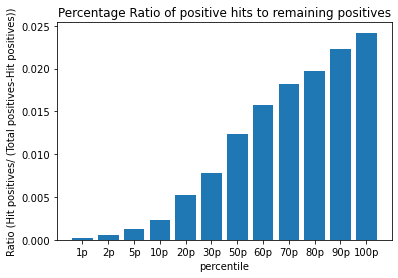

0    2242
1       6
2       2
dtype: int64
0    2242
1       6
2       2
dtype: int64
9
0    2235
1      12
2       3
dtype: int64
0    2235
1      12
2       3
dtype: int64
17
0    2225
1      21
2       4
dtype: int64
0    2225
1      21
2       4
dtype: int64
43
0    2203
1      40
2       6
3       1
dtype: int64
0    2202
1      40
2       7
3       1
dtype: int64
85
0    2152
1      82
2      12
3       3
4       1
dtype: int64
0    2142
1      88
2      14
3       5
4       1
dtype: int64
169
0    2097
1     126
2      17
3       6
5       3
4       1
dtype: int64
0    2078
1     137
2      22
3       8
5       3
4       2
dtype: int64
253
0    2020
1     171
2      36
3      17
4       3
6       3
dtype: int64
0    1985
1     179
2      51
3      24
4       4
5       3
6       3
7       1
dtype: int64
421
0    1976
1     196
2      50
3      19
4       5
6       3
7       1
dtype: int64
0    1924
1     203
2      75
3      35
4       4
7       4
5       3
6       2
dtype: int64

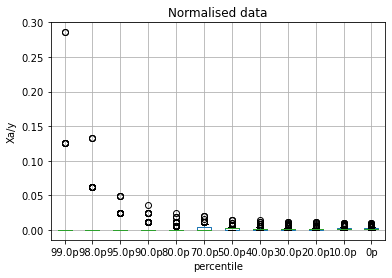

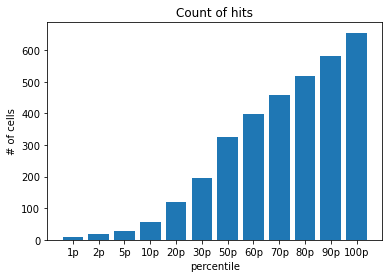

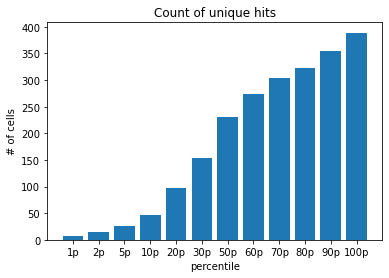

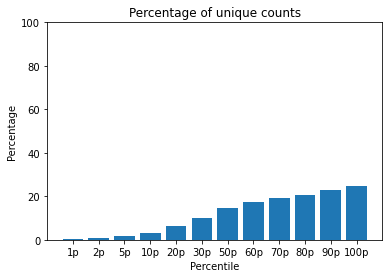

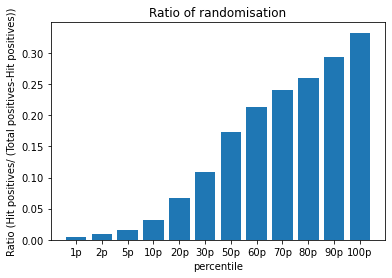

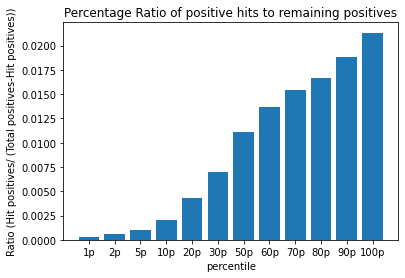

0    2246
1       4
dtype: int64
0    2246
1       4
dtype: int64
9
0    2243
1       7
dtype: int64
0    2243
1       7
dtype: int64
17
0    2236
1      12
2       1
3       1
dtype: int64
0    2236
1      12
2       1
3       1
dtype: int64
43
0    2209
1      38
2       2
3       1
dtype: int64
0    2209
1      38
2       2
3       1
dtype: int64
85
0    2162
1      81
2       5
3       1
4       1
dtype: int64
0    2151
1      87
2       8
3       3
4       1
dtype: int64
169
0    2106
1     132
2       9
3       1
4       1
5       1
dtype: int64
0    2091
1     143
2      10
3       2
4       2
5       1
6       1
dtype: int64
253
0    2039
1     174
2      26
3       6
7       2
4       1
5       1
6       1
dtype: int64
0     2007
1      183
2       45
3        8
4        3
11       2
5        1
7        1
dtype: int64
421
0    1996
1     206
2      32
3       8
4       4
6       2
8       2
dtype: int64
0     1960
1      206
2       61
3       13
4        4
5        2
13      

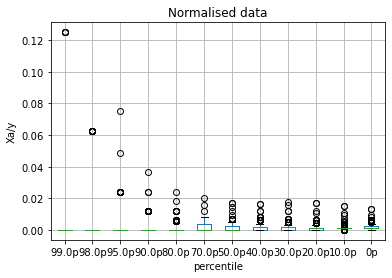

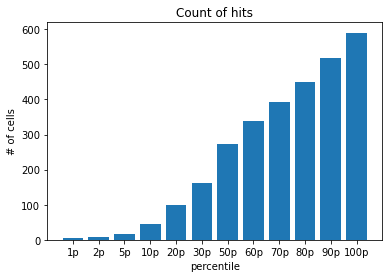

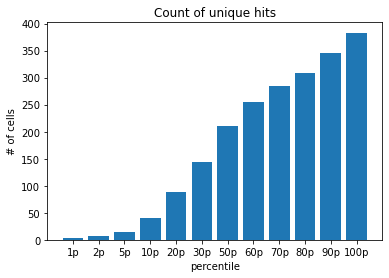

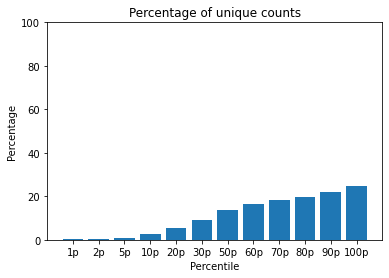

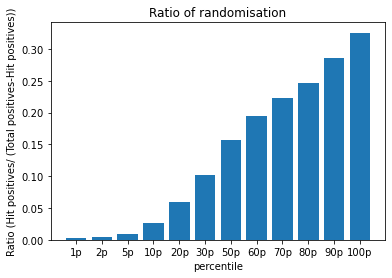

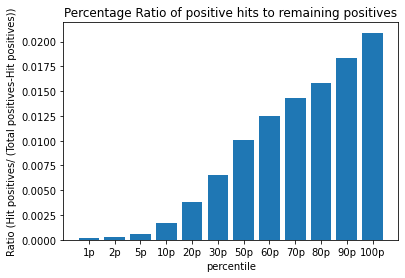

0    2241
1       8
2       1
dtype: int64
0    2241
1       8
2       1
dtype: int64
9
0    2236
1      12
2       2
dtype: int64
0    2236
1      12
2       2
dtype: int64
17
0    2214
1      28
2       8
dtype: int64
0    2214
1      28
2       8
dtype: int64
43
0    2195
1      42
2      13
dtype: int64
0    2194
1      42
2      14
dtype: int64
85
0    2140
1      87
2      17
3       3
4       3
dtype: int64
0    2123
1     101
2      18
3       5
4       3
dtype: int64
169
0    2092
1     128
2      23
5       3
4       2
3       1
6       1
dtype: int64
0    2071
1     145
2      25
3       3
5       3
4       2
6       1
dtype: int64
253
0    2020
1     167
2      40
3      16
7       3
5       2
4       1
6       1
dtype: int64
0    1981
1     195
2      46
3      18
5       5
7       3
4       1
6       1
dtype: int64
421
0    1971
1     210
2      37
3      17
4       9
7       5
6       1
dtype: int64
0    1922
1     227
2      61
3      23
5       6
7       6
4       4
6 

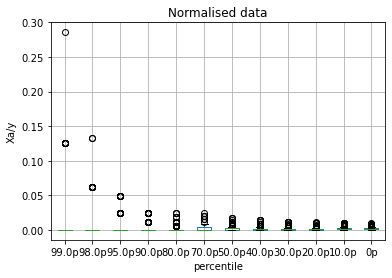

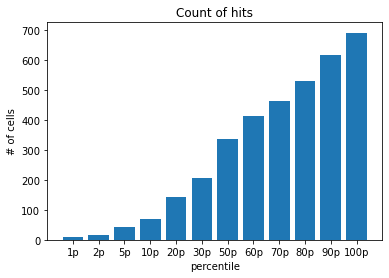

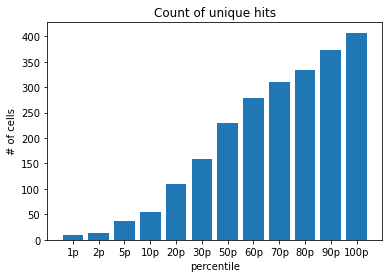

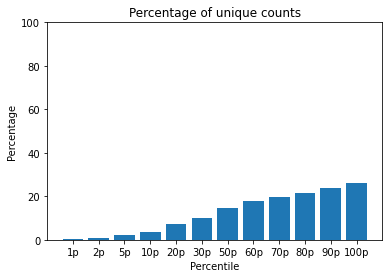

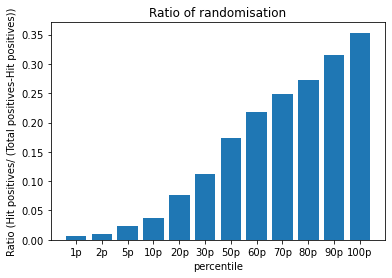

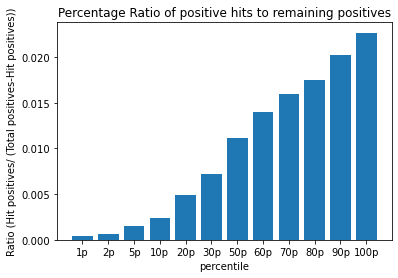

0    2242
1       7
2       1
dtype: int64
0    2242
1       7
2       1
dtype: int64
9
0    2233
1      15
2       2
dtype: int64
0    2233
1      15
2       2
dtype: int64
17
0    2220
1      24
2       6
dtype: int64
0    2220
1      24
2       6
dtype: int64
43
0    2210
1      30
2       8
3       2
dtype: int64
0    2207
1      33
2       8
3       2
dtype: int64
85
0    2145
1      86
2      15
3       2
4       2
dtype: int64
0    2126
1     100
2      17
3       5
4       2
dtype: int64
169
0    2093
1     130
2      23
5       2
4       1
6       1
dtype: int64
0    2066
1     152
2      23
3       5
5       2
4       1
6       1
dtype: int64
253
0    2003
1     186
2      41
3      15
6       2
7       2
4       1
dtype: int64
0    1964
1     205
2      59
3      12
5       4
7       3
4       2
6       1
dtype: int64
421
0    1967
1     208
2      48
3      20
4       3
7       3
6       1
dtype: int64
0    1913
1     231
2      70
3      24
4       4
5       4
7       4
dt

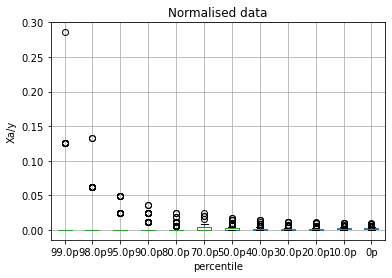

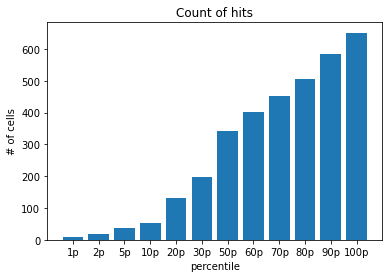

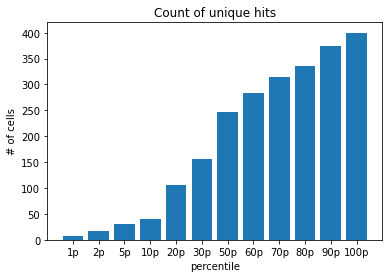

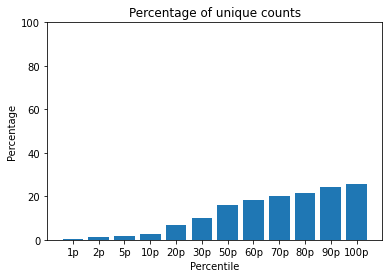

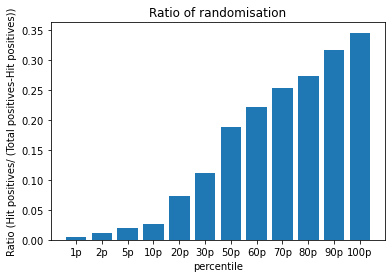

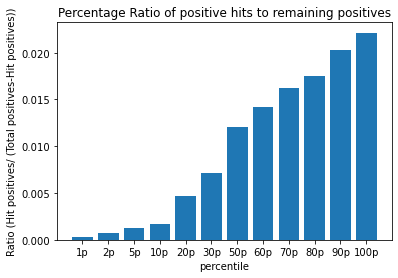

0    2247
1       3
dtype: int64
0    2247
1       3
dtype: int64
9
0    2241
1       8
2       1
dtype: int64
0    2241
1       8
2       1
dtype: int64
17
0    2234
1      15
2       1
dtype: int64
0    2234
1      15
2       1
dtype: int64
43
0    2214
1      33
2       3
dtype: int64
0    2214
1      31
2       5
dtype: int64
85
0    2162
1      79
2       8
4       1
dtype: int64
0    2147
1      88
2      13
3       1
4       1
dtype: int64
169
0    2114
1     118
2      16
3       1
4       1
dtype: int64
0    2094
1     128
2      23
3       3
4       2
dtype: int64
253
0    2033
1     173
2      29
3      13
6       1
7       1
dtype: int64
0     1992
1      190
2       47
3       12
5        5
4        2
6        1
11       1
dtype: int64
421
0    1991
1     203
2      35
3      14
4       5
6       1
8       1
dtype: int64
0     1941
1      213
2       64
3       22
6        5
4        3
5        1
12       1
dtype: int64
506
0    1957
1     220
2      51
3      14
5       4

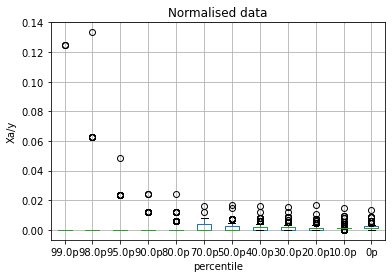

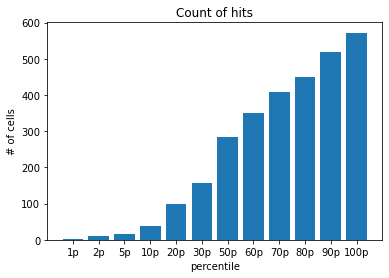

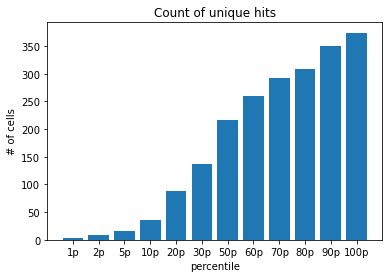

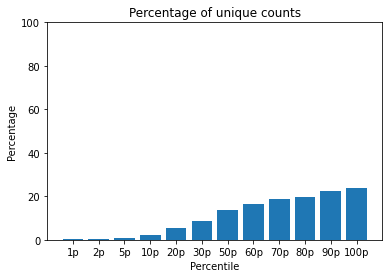

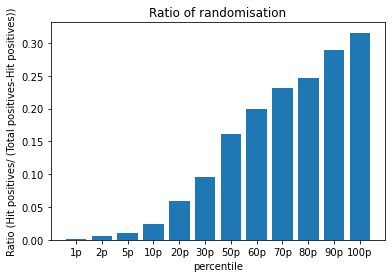

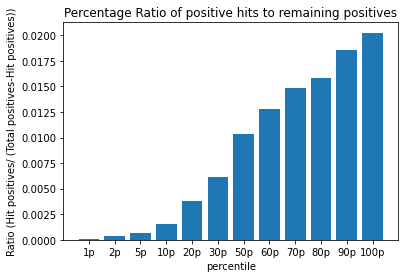

0    2243
1       5
2       2
dtype: int64
0    2243
1       5
2       2
dtype: int64
9
0    2237
1      10
2       3
dtype: int64
0    2237
1      10
2       3
dtype: int64
17
0    2222
1      25
2       3
dtype: int64
0    2222
1      25
2       3
dtype: int64
43
0    2198
1      45
2       4
3       3
dtype: int64
0    2198
1      44
2       5
3       3
dtype: int64
85
0    2138
1     101
2       5
3       3
4       3
dtype: int64
0    2121
1     116
2       6
3       4
4       3
dtype: int64
169
0    2088
1     136
2      18
3       2
4       2
5       2
6       2
dtype: int64
0    2065
1     155
2      21
3       3
4       2
5       2
6       2
dtype: int64
253
0    2015
1     182
2      31
3      16
5       2
6       2
7       2
dtype: int64
0    1974
1     205
2      45
3      17
5       4
7       3
4       1
6       1
dtype: int64
421
0    1985
1     206
2      31
3      19
4       3
6       3
7       3
dtype: int64
0    1934
1     216
2      65
3      25
6       4
7       4
4 

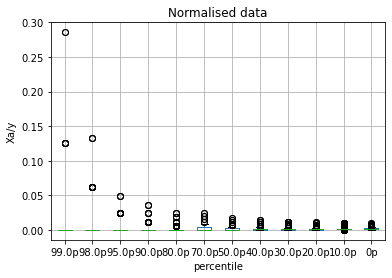

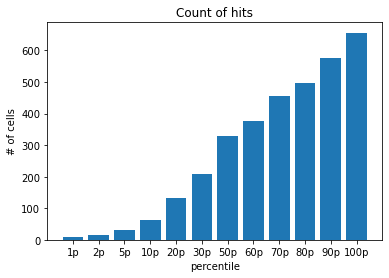

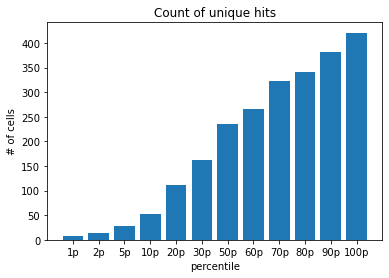

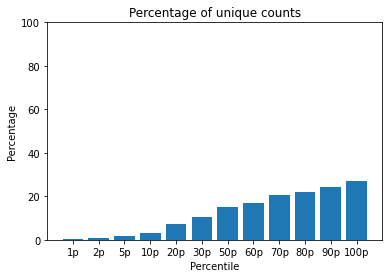

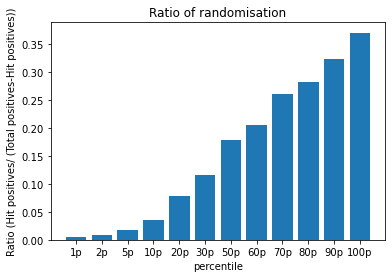

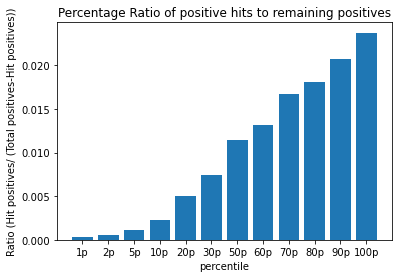

In [19]:
#GENERATE UNIQUE HITS RANDOMLY 10 TIMES
os.chdir('/home/sidrah19220/nmd/loomfiles/randomization/wild/trans/')
ratio_data={}
unique_number = {}
unique_percentage = {}

for folder in range(10):
    di='random_'+str(folder)
    os.mkdir(di)
    os.chdir(di)
    import random
    for key,values in cell_mat.items():
        or_rec=olf_rec.copy()
        if len(values)==0:
            continue
        else:
            or_rec.remove(values[0])
            cell_mat[key]=random.sample(or_rec,1) 
    with open("Out_data_trn_contr"+str(folder)+".csv","w")as fout:
        fout.write("Olfactory Receptor,Mature Cell ID,Immature/Transition Cell ID, ED,Dist. Rank,Receptor Expression Rank,Receptor Expression,Expression Diffrence from rank1\n")
        empty_mat=[]
        mat_cell=eud.index
        imm_imt_cells=list(eud.columns.values.tolist())
        for i in range(len(mat_cell)):
            mat1={}
            for j in range(len(imm_imt_cells)):
                mat1[eud.iloc[i][j]]=imm_imt_cells[j]
            euds=sorted(mat1.keys(), reverse=True)
            for j in range(len(euds)):
                if len(cell_mat[mat_cell[i]])==0:
                    empty_mat.append(mat_cell[i])
                else:
                    if cell_mat[mat_cell[i]][0] in cell_imm_imt[mat1[euds[j]]]:
                        for k in range(len(cell_imm_imt[mat1[euds[j]]])):
                            if cell_imm_imt[mat1[euds[j]]][k]==cell_mat[mat_cell[i]][0]:
                                #print(cell_imm_imt[mat1[euds[j]]][k],mat_cell[i],mat1[euds[j]],euds[j],k,di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])
                                fout.write(str(cell_imm_imt[mat1[euds[j]]][k])+','+str(mat_cell[i])+','+str(mat1[euds[j]])+','+str(euds[j])+','+str(j)+','+str(k)+','+str(di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+','+str((di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][0]])-di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+'\n')

        #CALCULATING PERCENTILE AT DIFFERENT THRESHOLD 
    eu = eud
    li = [0.99, 0.98, 0.95, 0.9, 0.8, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0]
    for ki in li:
        q = eu.quantile(ki , axis = 1)
        q1 = q.tolist()
        qq = pd.DataFrame(q)

        idd = eu.index.tolist()
        ccl = eu.columns.tolist()
        d4=dict.fromkeys(idd)

        #loop to generate imm cells
        k = []
        for i in range(len(idd)):
            for j in range(len(ccl)):
                if eu.iloc[i][j] > q1[i]:
                    k.append(ccl[j])
            d4[idd[i]] = k
            k=[]

        p = []
        for i in idd:
            p.append(len(d4[i]))
        cells = pd.DataFrame.from_dict(d4, orient='index')
        cells.to_csv(str(ki)+'percentile_trn_total_immature.csv')

        #ASSIGNING THE STATUS POSITIVE AND NEGATIVE ON BASIS OF THE mOSN THAT LIE IN THAT PARTICULAR THRESHOLD
    for ki in li:
        p=pd.read_csv(str(ki)+'percentile_trn_total_immature.csv', index_col = 0)
        o = pd.read_csv('Out_data_trn_contr'+str(folder)+'.csv')
        dictt={}
        v =  o['Mature Cell ID'].tolist()
        v2 = o['Immature/Transition Cell ID'].tolist()
        for indx in range(len(v)):
            if v[indx]==v[indx-1]:
                dictt[v[indx]].append(v2[indx])
            else:
                dictt[v[indx]]=[]
                dictt[v[indx]].append(v2[indx])
        ke=[]
        for key in dictt:
            ke.append(key)
        pp = p.loc[ke].T
        ppp = pp.to_dict('list')
        dup = pd.read_csv('Out_data_trn_contr'+str(folder)+'.csv')
        stat=[]
        for i in range(0,len(dup['Immature/Transition Cell ID'])):
            if dup['Immature/Transition Cell ID'][i] in ppp[dup['Mature Cell ID'][i]]:
                stat.append('Positive')
            else:
                stat.append('Negative')

        dup['status'] = stat
        #dup.to_csv('Final_spl_10q.csv')
        dup.to_csv(str(ki)+'percentile_neg_pos_out_data.csv')
        euk = dup[(dup['status']=='Positive') & (dup['Expression Diffrence from rank1']==0)]
        euk.to_csv(str(ki)+'_final_res.csv')
        
        
    #CREATING A DATAFRAME AT DIFFERENT PERCENTILE SHOWING RATIO OF EXPRESSED ORs HAVING HIGHEST EXPRESSION TO NON-EXPRESSED
    DF4=pd.DataFrame()
    for ki in li:
        x = pd.read_csv(str(ki)+'_final_res.csv', index_col = 0)
        o = pd.read_csv('Out_data_trn_contr'+str(folder)+".csv", index_col =0)
        eu = eud
        mat_uniq = eu.index.tolist()
        dictt={}
        v =  x['Mature Cell ID'].tolist()
        v2 = x['Immature/Transition Cell ID'].tolist()

        for indx in range(len(v)):
            if v[indx]==v[indx-1]:

                dictt[v[indx]].append(v2[indx])
            else:
                dictt[v[indx]]=[]
                dictt[v[indx]].append(v2[indx])
        xa_dict={}
        for ma in mat_uniq:
            if ma in dictt.keys():
                xa_dict[ma]=len(dictt[ma])
            else:
                xa_dict[ma]=0
        df2 = pd.DataFrame.from_dict(xa_dict, orient='index')
        print(df2.value_counts())

        pos_neg = pd.read_csv(str(ki)+'percentile_neg_pos_out_data.csv')
        pos_neg2 = pos_neg[pos_neg['status'] == 'Positive']
        dictt2={}
        v =  pos_neg2['Mature Cell ID'].tolist()
        v2 = pos_neg2['Immature/Transition Cell ID'].tolist()

        for indx in range(len(v)):
            if v[indx]==v[indx-1]:

                dictt2[v[indx]].append(v2[indx])
            else:
                dictt2[v[indx]]=[]
                dictt2[v[indx]].append(v2[indx])

        x_dict={}
        for ma in mat_uniq:
            if ma in dictt2.keys():
                x_dict[ma]=len(dictt2[ma])
            else:
                x_dict[ma]=0

        df3 = pd.DataFrame.from_dict(x_dict, orient='index')
        print(df3.value_counts())
        df3.columns = ['x']
        percentile = pd.read_csv(str(ki)+'percentile_spl_total_immature.csv', index_col =0)
        xny=len(percentile.columns.values.tolist())
        print(xny)
        if len(percentile.index.values.tolist())==len(df3):
            df3['y'] = xny - df3['x'] 
        xa = df2[0].values.tolist()
        df3['xa'] = xa
        df3['xay'] = df3['xa']/df3['y']
        df3.to_csv(str(ki*100)+'percentile_boxplot.csv')

        DF4[str(ki*100)+'p']=df3['xay']

    DF4.to_csv('plot_boxplot_spl.csv')
    p  = o.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')['Mature Cell ID'].tolist()
    DF4.loc[p].boxplot()
    plt.xlabel('percentile')
    plt.ylabel('Xa/y')
    plt.title('Normalised data')
    plt.savefig('normalised_data_spl.pdf')
    plt.show()

    o_unique = o.drop_duplicates(subset = 'Mature Cell ID', keep ='first')
    mat_uniq= o_unique['Mature Cell ID'].values.tolist()
    dictt={}
    v =  o['Mature Cell ID'].tolist()
    v2 = o['Immature/Transition Cell ID'].tolist()

    for indx in range(len(v)):
        if v[indx]==v[indx-1]:

            dictt[v[indx]].append(v2[indx])
        else:
            dictt[v[indx]]=[]
            dictt[v[indx]].append(v2[indx])

    f1 = pd.read_csv('0.99_final_res.csv')
    f2 = pd.read_csv('0.98_final_res.csv')
    f5 = pd.read_csv('0.95_final_res.csv')
    f10 = pd.read_csv('0.9_final_res.csv')
    f20 = pd.read_csv('0.8_final_res.csv')
    f30 = pd.read_csv('0.7_final_res.csv')
    f50 = pd.read_csv('0.5_final_res.csv')
    f60 = pd.read_csv('0.4_final_res.csv')
    f70 = pd.read_csv('0.3_final_res.csv')
    f80 = pd.read_csv('0.2_final_res.csv')
    f90 = pd.read_csv('0.1_final_res.csv')
    f100 = pd.read_csv('0_final_res.csv')
    
    
    #PLOT OF NUMBER OF HITS

    liii=[f1, f2, f5, f10, f20, f30, f50, f60, f70, f80, f90, f100]
    valss=[]
    for i in liii:
        valss.append(len(i))

    x = ['1p', '2p', '5p', '10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
    plt.bar(x,valss)
    plt.title('Count of hits')
    plt.xlabel('percentile')
    plt.ylabel('# of cells')
    plt.savefig('number of hits trn.pdf')
    plt.show()

    unique_f1 = f1.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f2 = f2.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f5 = f5.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f10 = f10.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f20 = f20.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f30 = f30.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f50 = f50.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f60 = f60.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f70 = f70.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f80 = f80.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f90 = f90.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')
    unique_f100 = f100.drop_duplicates(subset = 'Mature Cell ID', keep = 'first')

    
        #PLOT OF NUMBER OF UNIQUE mOSNs 
    liii=[unique_f1, unique_f2, unique_f5, unique_f10, unique_f20, unique_f30, unique_f50, unique_f60, unique_f70, unique_f80,
          unique_f90, unique_f100]
    valss_unique=[]
    for i in liii:
        valss_unique.append(len(i))

    
    unique_number[str(folder)]=valss_unique
    
    gra = pd.DataFrame(valss_unique)
    gra.to_csv('unique-count.csv')
    
    
    x = ['1p', '2p', '5p', '10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
    plt.bar(x,valss_unique)
    plt.title('Count of unique hits')
    plt.xlabel('percentile')
    plt.ylabel('# of cells')
    plt.savefig('number of unique hits transition.pdf')
    plt.show()

    
        #PERCENTAGE OF UNIQUE mOSNs
    valssf=[]
    for v in valss_unique:
        valssf.append((v/1559)*100)
        
    
    unique_percentage[str(folder)]=valssf
    
    
    gra = pd.DataFrame(valssf)
    gra.to_csv('unique-percentage.csv')

    plt.bar(x,valssf)
    plt.title('Percentage of unique counts')
    plt.xlabel('Percentile')
    plt.ylabel('Percentage')
    plt.savefig('percentage')
    plt.yticks([0, 20, 40, 60, 80, 100])
    plt.savefig('percentage_control_divbyunique.pdf')
    plt.show()

    list1 = [unique_f1, unique_f2, unique_f5, unique_f10, unique_f20, unique_f30, unique_f50, unique_f60, unique_f70, 
             unique_f80, unique_f90, unique_f100]

    graph1 =[]
    for mature_cell in list1:
        graph1.append(len(mature_cell)/(1559-len(mature_cell)))

    
    
    xaxis = ['1p', '2p', '5p','10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
    plt.bar(xaxis,graph1)
    plt.title('Ratio of randomisation')
    plt.xlabel('percentile')
    plt.ylabel('Ratio (Hit positives/ (Total positives-Hit positives))')
    plt.savefig('ratio graph.pdf')
    plt.show()

    ratio_data[str(folder)]=graph1
    list2 = graph1
    graph2 =[]
    for mature_cell in list2:
        graph2.append((mature_cell/1559)*100)
    
    
    xaxis = ['1p', '2p', '5p','10p', '20p', '30p', '50p', '60p', '70p', '80p', '90p', '100p']
    plt.bar(xaxis,graph2)
    plt.title('Percentage Ratio of positive hits to remaining positives')
    plt.xlabel('percentile')
    plt.ylabel('Ratio (Hit positives/ (Total positives-Hit positives))')
    plt.savefig('ratio graph percentage.pdf')
    plt.show()
    os.chdir('/home/sidrah19220/nmd/loomfiles/randomization/wild/trans/')

In [31]:
data_frame = pd.DataFrame.from_dict(ratio_data, orient = 'columns')
data_frame.to_csv('chi-square-data-transcriptomic-control.csv')

In [ ]:
#SAVE 10 RANDOMLY GENERATED UNIQUE PERCENTAGE OF HIT 
data_frame = pd.DataFrame.from_dict(unique_percentage, orient = 'columns')
data_frame.to_csv('chi-square-unique percentage-trn-control.csv')

In [ ]:
#SAVE 10 RANDOMLY GENERATED UNIQUE HIT 
data_frame = pd.DataFrame.from_dict(unique_number, orient = 'columns')
data_frame.to_csv('chi-square-unique number-trn-control.csv')